In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from timeit import default_timer as timer
%matplotlib inline

(See OneNote notes for follow-on derivations.)

### Motivating the Normal Distribution

Given the binomial distribution $\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}$, what value of $k$ maximizes the expression for a given $N$?

(array([1.00000e+00, 2.20000e+01, 1.73000e+02, 1.08800e+03, 4.64100e+03,
        1.45910e+04, 3.69790e+04, 7.38620e+04, 1.20142e+05, 1.60217e+05,
        1.75876e+05, 1.60162e+05, 1.20467e+05, 7.40940e+04, 3.71210e+04,
        1.47450e+04, 4.47900e+03, 1.13500e+03, 1.80000e+02, 2.50000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

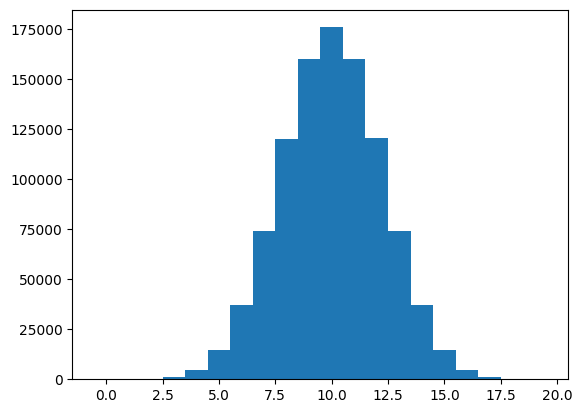

In [3]:
plt.hist(np.random.binomial(20, 0.5, int(1e6)), range=(0, 20), bins=20, align='left')

### Deriving the equation for a normal distribution

##### Shape of a quadratic around a mean, $\mu$

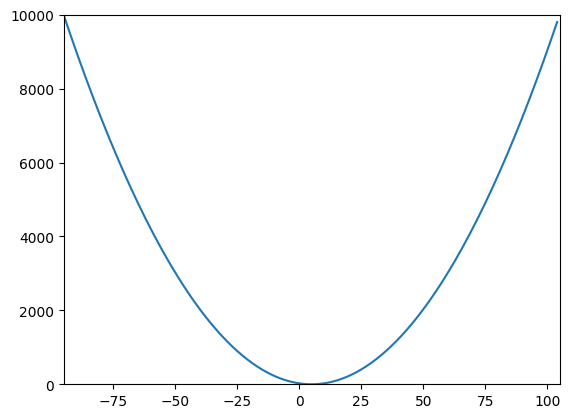

In [4]:
mu = 5
x = np.arange(-100+mu, 100+mu)
plt.xlim(-100+mu, 100+mu)
plt.ylim(0, 10000)
plt.plot(x, (x-mu)**2)

##### Affecting the spread of a quadratic, $\sigma^2$

$\sigma^2 > 1$ will flatten our curve, while $\sigma^2 < 1$ will sharpen the curve. 

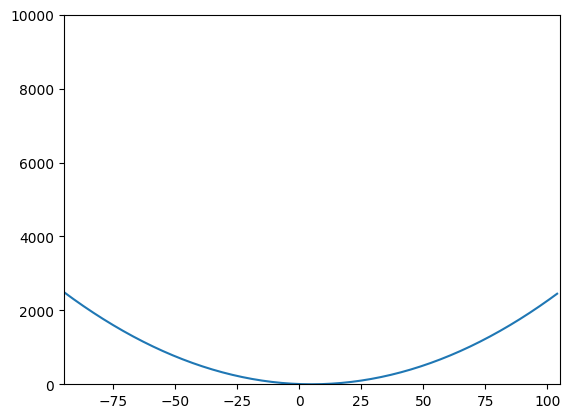

In [5]:
plt.xlim(-100+mu, 100+mu)
plt.ylim(0, 10000)
plt.plot(x, (x-mu)**2/4)

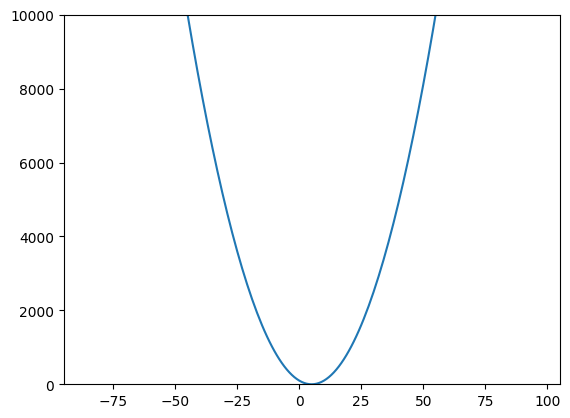

In [6]:
plt.xlim(-100+mu, 100+mu)
plt.ylim(0, 10000)
plt.plot(x, (x-mu)**2/.25)

##### Flipping our plot, $-\frac{1}{2}$


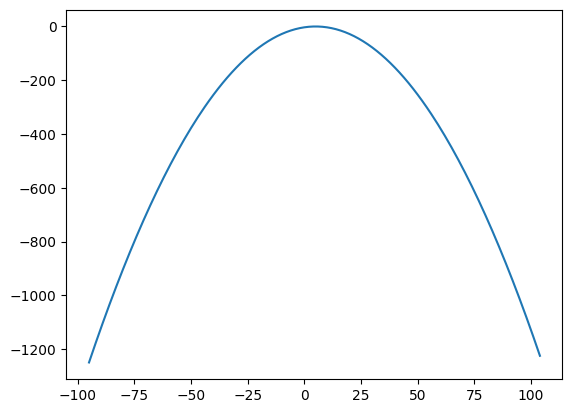

In [7]:
var = 4
scale = -.5
plt.plot(x, (x-mu)**2*scale/var)

##### Reviewing $e$

Let's look at $e^x_1$ with $x_1 = \left(-\infty, 0\right]$ and $e^{-x_2}$ with $x_2 = \left[0, \infty\right)$.

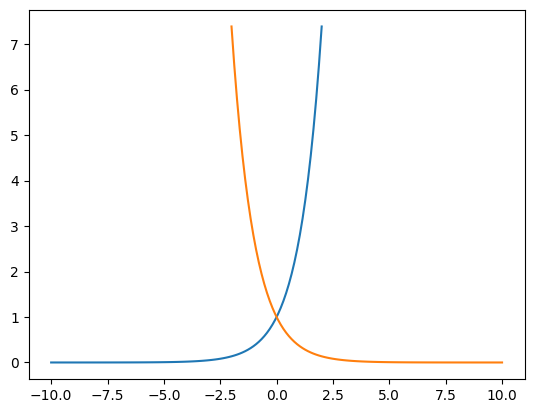

In [8]:
x1 = np.linspace(-10, 2, 100)
x2 = np.linspace(-2, 10, 100)
plt.plot(x1, np.exp(x1), x2, np.exp(-x2))

Zooming in around $x=0$ while showing the normal distribution, we have:

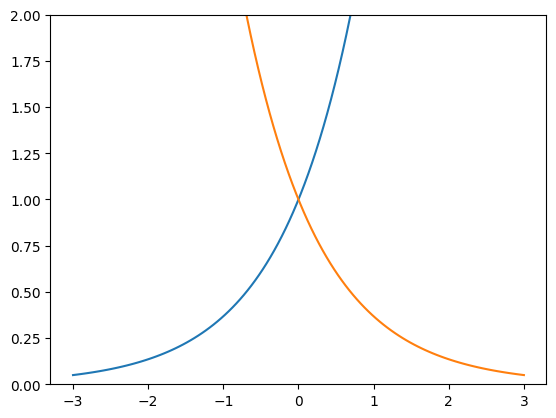

In [9]:
x1 = np.linspace(-3, 2, 100)
x2 = np.linspace(-2, 3, 100)
plt.ylim(0, 2)
plt.plot(x1, np.exp(x1), x2, np.exp(-x2))

Now let's consider the case where $x$ is constrained to $\left(-\infty, 0\right]$. In our case, this will be due to the quadratic we looked at previously.

So now if $f(x) = e^{-\frac{(x-\mu)^2}{2\sigma^2}}$, then we find that $$\underset{x}{\operatorname{arg max}}f(x) = \mu$$

Furthermore, we find that $$\lim_{x\to-\infty}f(x) = \lim_{x\to-\infty}f(x) = 0$$

Given all of this information, we see that, if $\mu=0$, then $f(x)$ with $x=\left(-\infty,\infty\right)$ is constrained by our previous plots wich was for $e^x_1$ with $x_1 = \left(-\infty, 0\right]$ and $e^{-x_2}$ with $x_2 = \left[0, \infty\right)$.

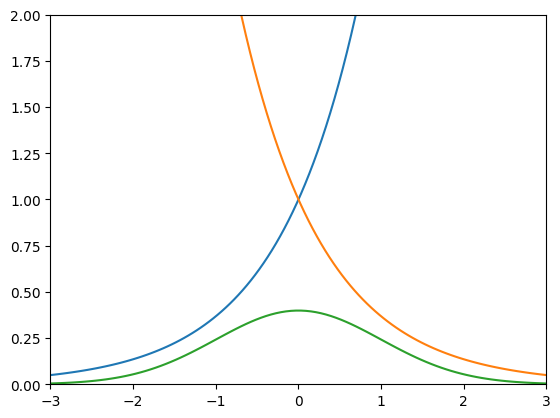

In [10]:
x1 = np.linspace(-3, 2, 100)
x2 = np.linspace(-2, 3, 100)
x3 = np.linspace(-3, 3, 100)
plt.xlim(-3, 3)
plt.ylim(0, 2)
plt.plot(x1, np.exp(x1), x2, np.exp(-x2))
plt.plot(x3, norm.pdf(x3, 0, 1))

### [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)

Let $X_1$, $X_2$, $\dots$, $X_N$ denote a random sample of $n$ independent observations from a population with overall expected value, or average, $\mu$ and finite variance $\sigma^2$, and let $\bar{X_N}$ denote the mean of the sample distribution of the mean. Then the limit as $n\to\infty$ of the distribution of $\frac{\bar{X_N}-\mu}{\sigma_{\bar{X_N}}}$, where $\sigma_{\bar{X_N}} = \frac{\sigma}{\sqrt{N}}$, is the standard normal distribution.

In other words, suppose that a large sample of observations is obtained, each observation being randomly produced in a way that does not dependon the values of the other observations, and the mean of the observed values is computed. If this procedure is peformed many times, resulting in a collection of observed averages, the central limit theorem says that if the sample size was large enoughh, the probability distribution of these averages will closely approximate a normal distrubtion.

Now we will see how this is true for the binomial distribution. Let's imagine we conduct an experiment in which we flip a fair ($p=0.5$) coin $n$ times. Given we have a binomial distribution, this produces mean, $\mu = n*p$, and variance, $\sigma^2=n*p*(1-p)$. This experiment is run $N$ times.

(array([1.500000e+01, 1.400000e+02, 1.310000e+03, 8.843000e+03,
        4.491800e+04, 1.697620e+05, 4.880120e+05, 1.054579e+06,
        1.721870e+06, 2.106335e+06, 1.947376e+06, 1.357754e+06,
        7.112880e+05, 2.816610e+05, 8.382400e+04, 1.866500e+04,
        3.203000e+03, 3.980000e+02, 4.400000e+01, 3.000000e+00]),
 array([4991722. , 4992573.5, 4993425. , 4994276.5, 4995128. , 4995979.5,
        4996831. , 4997682.5, 4998534. , 4999385.5, 5000237. , 5001088.5,
        5001940. , 5002791.5, 5003643. , 5004494.5, 5005346. , 5006197.5,
        5007049. , 5007900.5, 5008752. ]),
 <BarContainer object of 20 artists>)

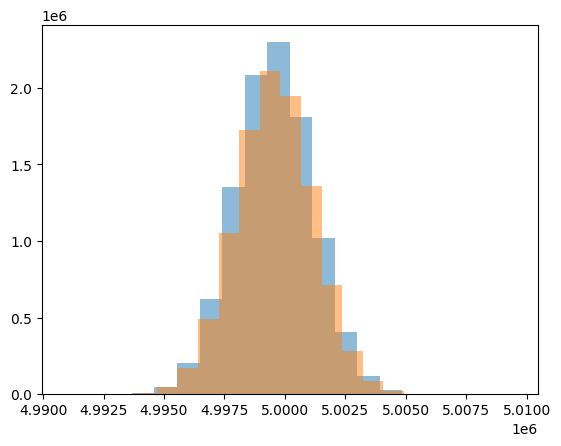

In [11]:
n = int(1e7)
p = 0.5
N = int(1e7)
plt.hist(np.random.normal(p*n, np.sqrt(p*(1-p)*n), n), bins=20, align='left', alpha=0.5)
plt.hist(np.random.binomial(int(n), p, N), bins=20, align='left', alpha=0.5)